![Astrofisica Computacional](../logo.PNG)

---

Eduard Larrañaga (ealarranaga@unal.edu.co)

---

---
# Ejercicio 01. Métodos Numéricos Básicos

## B. Rejillas de Difrección

Considere radiación electromagnética con longitud de onda $\lambda$ incidente en una rejilla de difracción con ancho total $w$. Luego de ser difractada, la luz es enfocada por una lente de longitud focal $f$ y es registrada en una pantalla (ver Figura).

El patrón de difracción en la pantalla estará descrito por la relación 
\begin{equation}
    I(x) = \left| \int^{\frac{w}{2}}_{-\frac{w}{2}} \sqrt{q(u)} \exp{\left(\frac{2\pi i xu}{\lambda f}\right)} du \right|^2,
\end{equation}
donde $x$ es la distancia sobre la pantalla desde el eje central del sistema y $q(u)$ es la función de transmisión de intensidad de la rejilla a una distancia $u$ del eje central (esta función representa la fracción de luz incidente que la rejilla deja atravesar).

---

3. Generalice el código para graficar los siguientes casos:

a) Una rejilla con una función de transmisión 

\begin{equation}
q(u) = \sin^2 (\alpha u)\sin^2 (\beta u)
\end{equation}

donde $\alpha$ esta definido como en el punto anterior y $\beta = \frac{\alpha}{2}$.



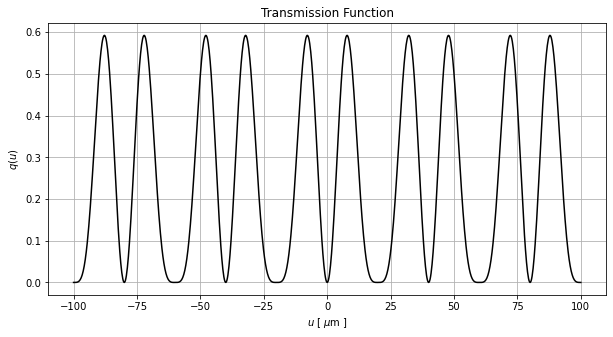

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def q(u,slit_separation):
    '''
    Transmission function
    ------------------------------------------------------------
    Arguments
    u: point location in the grid measured in micro-meters
    slit_separation: separation between slits measured in 
                     micro-meters
    ------------------------------------------------------------
    Dependences: NumPy
    ------------------------------------------------------------
    '''
    # Parameter alpha in the transmission function
    alpha = np.pi/slit_separation
    beta =alpha/2
    return ((np.sin(alpha*u))**2)*((np.cos(beta*u))**2)

# Separtions between slits (micro-meters)
slit_separation = 20

# Total number of slits
N = 10
if N%2 == 0:
    u_m = slit_separation*N/2
else:
    u_m = slit_separation*(N+1)/2
    
urange = np.linspace(-u_m,u_m,1000)

plt.figure(figsize=(10,5))
plt.plot(urange, q(urange,slit_separation), color='black')
plt.grid()
plt.xlabel(r'$u$ [ $\mu$m ]')
plt.ylabel(r'$q(u)$')
plt.title('Transmission Function')
plt.show()

---
3. Implemente un código que calcule y grafique la intensidad del patrón de intensidad producido por la rejilla descrita en el punto anterior si esta tiene un total de 10 slits y la longitud de onda de la radiación incidente es $\lambda = 500 \text{ nm}$. Además, asuma que la longitud focal del lente es $f = 1 \text{ m}$ y que el ancho de la pantalla es de $10 \text{ cm}$.

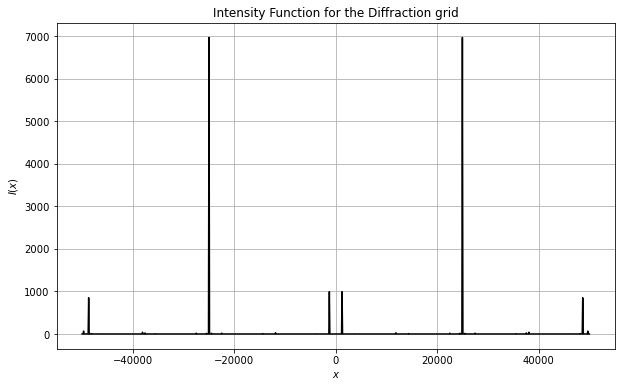

In [13]:
def Intensity(x, slit_separation=20, N=10, lmbda=500, fd=1):
    '''
    Intensity function for diffraction grid pattern.
    ------------------------------------------------------------
    Arguments
    x: distance form the center of the pattern measured in cm
    slit_separation: separation between slits measured in 
                     micro-meters 
    N: Total number of slits
    screen: Total width of the screen measured in cm
    lmbda: Wavelenght of the incident radiation measured
           in nano-meters
    fd: Focal Distance of the lens in meters
    
    ------------------------------------------------------------
    Dependences: NumPy
    ------------------------------------------------------------
    '''
    x *= 1e4 # cm to micrometer
    lmbda *= 1e-3 # nm to micrometer
    fd *= 1e6 # m to micrometer
    
    if N%2 == 0: # even
        w_half = slit_separation*N/2
    else: # odd
        w_half = slit_separation*(N+1)/2
    
    # Parameter alpha in the transmission function
    alpha = np.pi/slit_separation
    
    def q(u):
        '''
        Transmission function
        ------------------------------------------------------------
        Arguments
        u: point location in the grid measured in micro-meters
        slit_separation: separation between slits measured in 
                     micro-meters
        ------------------------------------------------------------
        Dependences: NumPy
        ------------------------------------------------------------
        '''
        beta = alpha/2
        return ((np.sin(alpha*u))**2)*((np.cos(beta*u))**2)
        
    def f(u, x):
        return np.sqrt(q(u))*np.exp(2*np.pi*1j*x*u/(lmbda*fd))
    
    n_integ=1000 # point in the integration
    urange = np.linspace(-w_half, w_half, n_integ)
    du = urange[1] - urange[0]
    integral = 0.
    for i in range(int((n_integ-1)/2)):
        integral += (du/3)*(f(urange[2*i],x) + 4*f(urange[2*i+1],x)+ f(urange[2*i+2],x))
    return abs(integral)**2

# Screen Definition
screen_size = 10 #cm
screen_ext = screen_size*1e4/2
N_screen = 1000 # Points in the screen

xrange = np.linspace(-screen_ext, screen_ext, N_screen)
intensity_pattern = np.zeros_like(xrange)

for i in range(N_screen):
    intensity_pattern[i] = Intensity(xrange[i], slit_separation=20, N=10, lmbda=500, fd=1)
    
plt.figure(figsize=(10,6))
plt.plot(xrange, intensity_pattern, color='black')
plt.grid()
plt.xlabel(r'$x$')
plt.ylabel(r'$I(x)$')
plt.title('Intensity Function for the Diffraction grid')
plt.show()

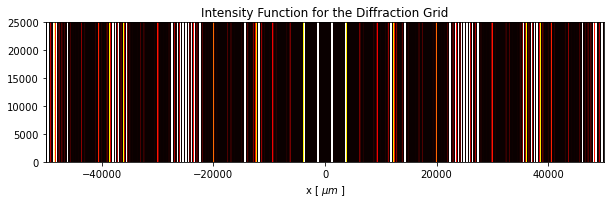

In [17]:
N_h = 1000 # Height of the pattern
xygrid = np.zeros([N_h,N_screen])
diffraction_pattern = np.zeros([N_h,N_screen])

for i in range(N_h):
    diffraction_pattern[i,:] =intensity_pattern 

extent = -screen_ext,screen_ext,0,screen_ext/2
plt.figure(figsize=(10,10))
plt.imshow(diffraction_pattern, cmap='hot', vmin = 0,vmax=1, extent=extent)
plt.title('Intensity Function for the Diffraction Grid')
plt.xlabel(r'x [ $\mu m$ ]')
plt.show()